In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min

In [2]:
# Fetching the MNIST dataset
mnist = fetch_openml('mnist_784')
mnist.data.shape

C:\Users\Bhumika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)

In [3]:
# Converting the data and target to numpy arrays
X = np.array(mnist.data)
y = np.array(mnist.target)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
# Creating a balanced training dataset of 30000 samples
classes = np.unique(y)          #taking all the unique values of y in classes
num_samples_per_class = 3000    #taking 3000 samples per class
X_train = []                
y_train = []
for cls in classes:             
    idx = np.where(y == cls)[0][:num_samples_per_class]     #to make the dataset balanced, we are taking 3000 samples from each class
    X_train.append(X[idx])                                  #appending the samples to X_train
    y_train.append(y[idx])                                  #appending the labels to y_train
X_train = np.concatenate(X_train, axis=0)                   
y_train = np.concatenate(y_train, axis=0)

X_train.shape

(30000, 784)

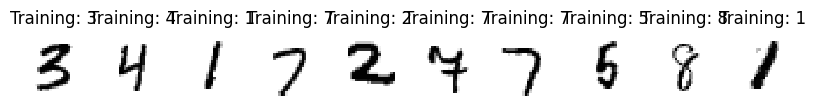

In [5]:
#plot the random 10 images from the dataset
#select 10 random images from the dataset
idx = np.random.randint(0, X_train.shape[0], 10)
images = X_train[idx]
labels = y_train[idx]

#plot the images
fig, ax = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    ax[i].set_axis_off()
    ax[i].imshow(images[i].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax[i].set_title('Training: %s' % labels[i])
plt.show()

In [6]:
# Applying PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_train_pca.shape

(30000, 2)

KMeans clustering:


C:\Users\Bhumika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 10 | Sum of purities: 4.255720879967573


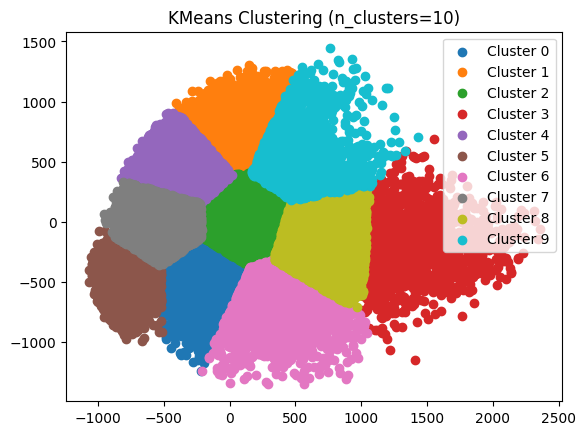

C:\Users\Bhumika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 20 | Sum of purities: 9.22414002091939


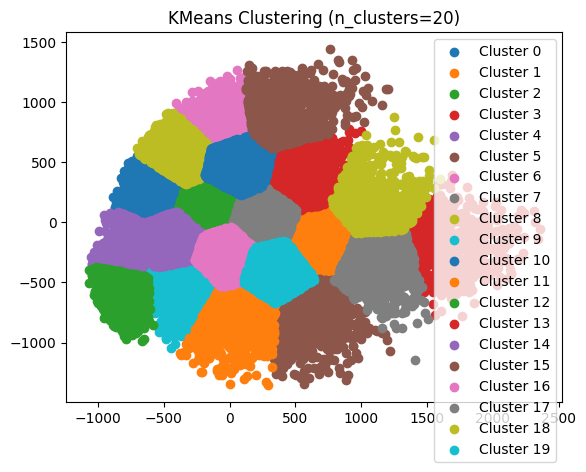

C:\Users\Bhumika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 30 | Sum of purities: 14.34254601816256


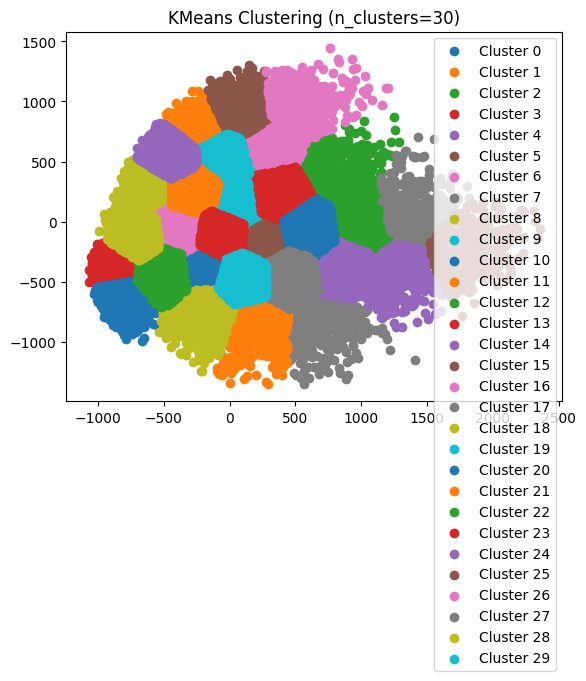

In [7]:
# KMeans clustering
print("KMeans clustering:")
kmeans_purities = []
for n_clusters in [10, 20, 30]:         #let's try with 10, 20 and 30 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)          #initializing the KMeans model
    y_pred = kmeans.fit_predict(X_train_pca)                        #fitting the model and predicting the labels
    purities = []
    for cluster in range(n_clusters):                               #calculating the purity for each cluster
        idx = np.where(y_pred == cluster)[0]                        #taking the indices of the samples in the cluster
        cls, counts = np.unique(y_train[idx], return_counts=True)   #taking the unique labels and their counts in the cluster
        purity = counts.max() / counts.sum()                         #calculating the purity
        purities.append(purity)                                      #appending the purity to purities
    purity_sum = sum(purities)                              #calculating the sum of purities
    kmeans_purities.append((n_clusters, purity_sum))        #appending the sum of purities to kmeans_purities
    print(f"Number of clusters: {n_clusters} | Sum of purities: {purity_sum}")   #printing the sum of purities

    # Plotting the clusters
    fig, ax = plt.subplots()
    for cluster in range(n_clusters):
        idx = np.where(y_pred == cluster)[0]
        ax.scatter(X_train_pca[idx, 0], X_train_pca[idx, 1], label=f'Cluster {cluster}')
    ax.legend()
    ax.set_title(f'KMeans Clustering (n_clusters={n_clusters})')
    plt.show()

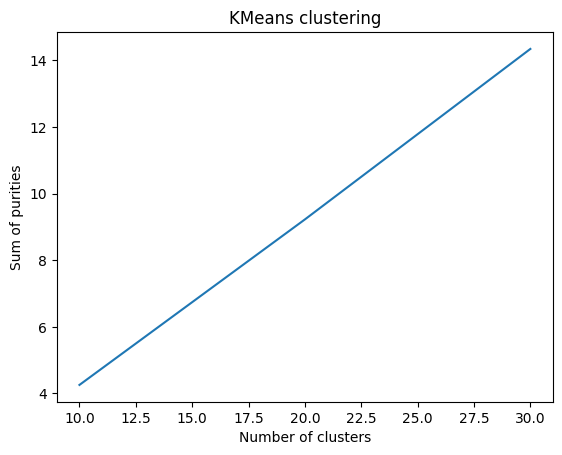

In [8]:
#plot the cluster purity
plt.plot([x[0] for x in kmeans_purities], [x[1] for x in kmeans_purities])
plt.xlabel('Number of clusters')
plt.ylabel('Sum of purities')
plt.title('KMeans clustering')
plt.show()

#we get linear increase in the sum of purities as the number of clusters increases as expected

DBSCAN clustering:
eps=0.1, min_samples=2 | Sum of purities: 1.6000133351113481


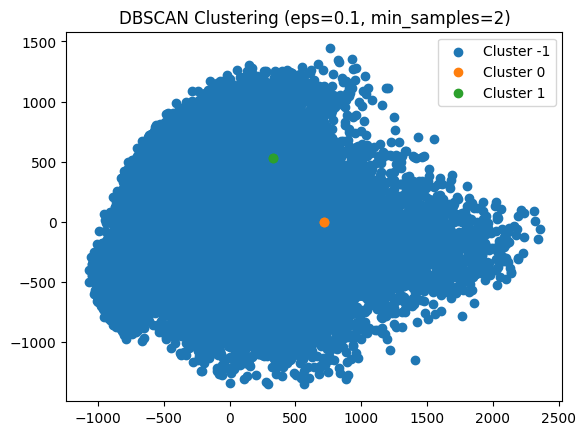

eps=0.2, min_samples=2 | Sum of purities: 10.100060056052316


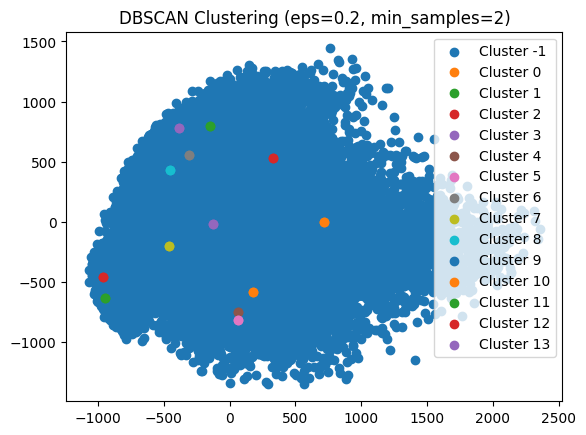

eps=0.3, min_samples=2 | Sum of purities: 29.600173808409654


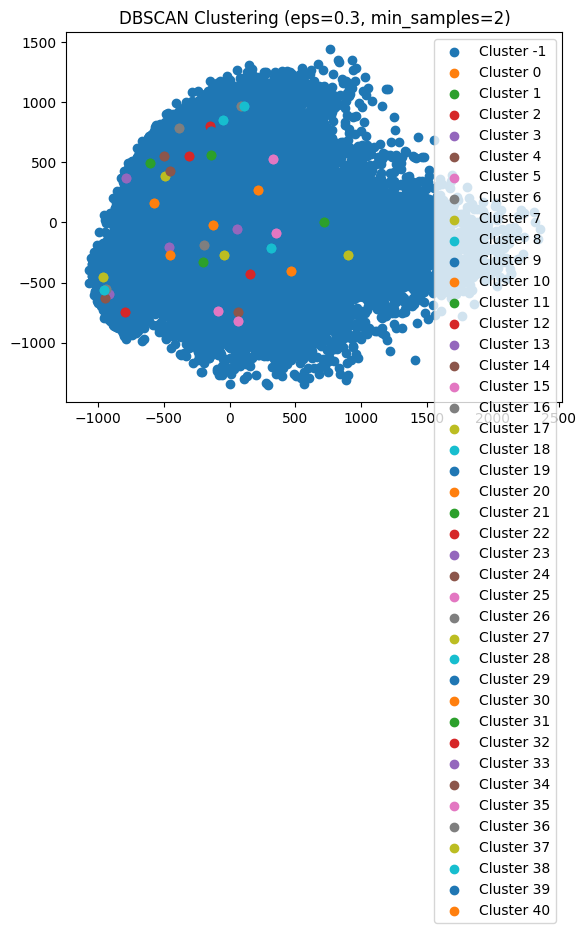


Best DBSCAN result: eps=0.3, min_samples=2 | Sum of purities: 29.600173808409654, Number of clusters: 42


In [9]:
# DBSCAN clustering
print("DBSCAN clustering:")
db_purities = []
for eps in [0.1, 0.2, 0.3]:
    for min_samples in [2, 3, 4]:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        y_pred = db.fit_predict(X_train_pca)
        if len(np.unique(y_pred)) > 1:
            purities = []
            for cluster in np.unique(y_pred):
                idx = np.where(y_pred == cluster)[0]
                cls, counts = np.unique(y_train[idx], return_counts=True)
                purity = counts.max() / counts.sum()
                purities.append(purity)
            purity_sum = sum(purities)
            db_purities.append((eps, min_samples, purity_sum))
            print(f"eps={eps}, min_samples={min_samples} | Sum of purities: {purity_sum}")

            # Plotting the clusters
            fig, ax = plt.subplots()
            for cluster in np.unique(y_pred):
                idx = np.where(y_pred == cluster)[0]
                ax.scatter(X_train_pca[idx, 0], X_train_pca[idx, 1], label=f'Cluster {cluster}')
            ax.legend()
            ax.set_title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
            plt.show()

# Finding the best result with the highest purity sum and lowest number of clusters
best_db_result = max(db_purities, key=lambda x: x[2])
print(f"\nBest DBSCAN result: eps={best_db_result[0]}, min_samples={best_db_result[1]} | Sum of purities: {best_db_result[2]}, Number of clusters: {len(np.unique(DBSCAN(eps=best_db_result[0], min_samples=best_db_result[1]).fit_predict(X_train_pca)))}")


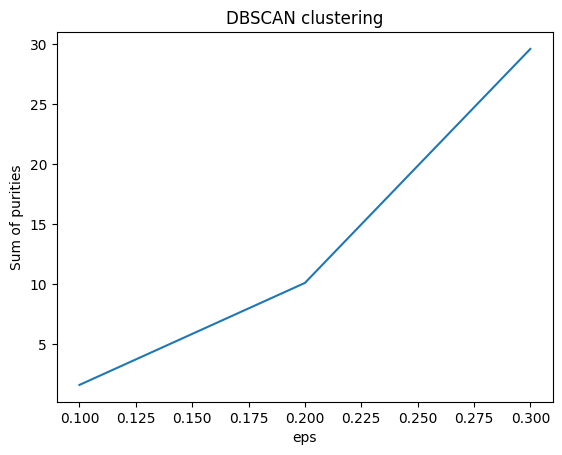

In [10]:
#plot the cluster purity
plt.plot([x[0] for x in db_purities], [x[2] for x in db_purities])
plt.xlabel('eps')
plt.ylabel('Sum of purities')
plt.title('DBSCAN clustering')
plt.show()

In [11]:
bandwidths = [0.1, 0.5, 1.0, 1.5, 2.0, 5.0, 10.0]

# Find the best bandwidth by maximizing the sum of purity across clusters
best_bandwidth = None
best_purity = 0
best_num_clusters = None
best_cluster_labels = None
for bandwidth in bandwidths:
    # Fit the meanshift model
    meanshift = MeanShift(bandwidth=bandwidth)
    meanshift.fit(X_train)

    # Compute the cluster purity
    cluster_labels = meanshift.labels_
    centroids = []
    for label in np.unique(cluster_labels):
        centroid = X_train[cluster_labels == label].mean(axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    closest_true_labels, _ = pairwise_distances_argmin_min(centroids, X_train)
    cluster_purities = []
    for label in np.unique(cluster_labels):
        true_labels = y_train[cluster_labels == label]
        cluster_purity = np.bincount(true_labels[closest_true_labels[label]]).max() / len(true_labels)
        cluster_purities.append(cluster_purity)
    sum_purity = np.sum(cluster_purities)
    
    # Update the best bandwidth
    if sum_purity > best_purity:
        best_purity = sum_purity
        best_bandwidth = bandwidth
        best_num_clusters = len(np.unique(meanshift.labels_))
        best_cluster_labels = cluster_labels

    #plotting the clusters
    fig, ax = plt.subplots()
    for cluster in np.unique(cluster_labels):
        idx = np.where(cluster_labels == cluster)[0]
        ax.scatter(X_train_pca[idx, 0], X_train_pca[idx, 1], label=f'Cluster {cluster}')
    ax.legend()
    ax.set_title(f'MeanShift Clustering (bandwidth={bandwidth})')
    plt.show()

print(f"Best MeanShift result: bandwidth={best_bandwidth} | Sum of purities: {best_purity}, Number of clusters: {best_num_clusters}")

In [ ]:
#plot the cluster purity
plt.plot(bandwidths, [best_purity for x in bandwidths])
plt.xlabel('bandwidth')
plt.ylabel('Sum of purities')
plt.title('MeanShift clustering')
plt.show()